In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from utils_plotting import val_map, display_dict
from utils_scaling import fit, plot_contours_params

import jax.numpy as jnp

In [3]:
# df = pd.read_csv("data/temp.csv")
df_big = pd.read_csv("data/extrapolation.csv")

In [4]:
def get_data(drop_df, key = "train/CrossEntropyLoss"):
    drop_df = drop_df.dropna(subset=[key])

    N = jnp.array(drop_df["params"], dtype=jnp.float32)
    D = jnp.array(drop_df["tokens"], dtype=jnp.float32)
    L = jnp.array(drop_df[key], dtype=jnp.float32)
    return N, D, L


In [9]:
# formats = ["bfloat16", "fp4_e2m1", "float16", "fp16", "fp8_e5m2", "fp8_e4m3", "fp6_e3m2", "fp6_e2m3", "fp4", "int8", "int4"]

formats = ["fp6_e2m3", "fp6_e3m2", "fp8_e4m3", "fp8_e5m2", "bfloat16"]

w_format = fp6_e2m3, fp6_e2m3
N 74
F 74
               F      L            N             D
68  2.000000e+17  1.100   72717120.0  4.582277e+08
59  4.000000e+17  0.980   90138240.0  8.084521e+08
50  1.000000e+18  0.890  134124288.0  1.188299e+09
37  2.100000e+18  0.825  266929152.0  1.305739e+09
25  4.600000e+18  0.770  311190848.0  2.449211e+09
9   1.000000e+19  0.730  541326912.0  3.078619e+09
0   2.200000e+19  0.695  415051200.0  8.833991e+09
w_format = fp6_e2m3, fp6_e3m2
N 12
F 12
              F     L            N             D
4  4.570000e+18  0.81  541326912.0  1.407975e+09
0  1.000000e+19  0.78  777930240.0  2.142241e+09
w_format = fp6_e2m3, fp8_e4m3
N 61
F 61
               F      L            N             D
55  2.000000e+17  1.115   72717120.0  4.582277e+08
46  4.400000e+17  1.000   90138240.0  8.084521e+08
36  9.600000e+17  0.920  161279040.0  9.882829e+08
21  2.090000e+18  0.860  360466560.0  9.667871e+08
8   4.570000e+18  0.810  541326912.0  1.407975e+09
0   1.000000e+19  0

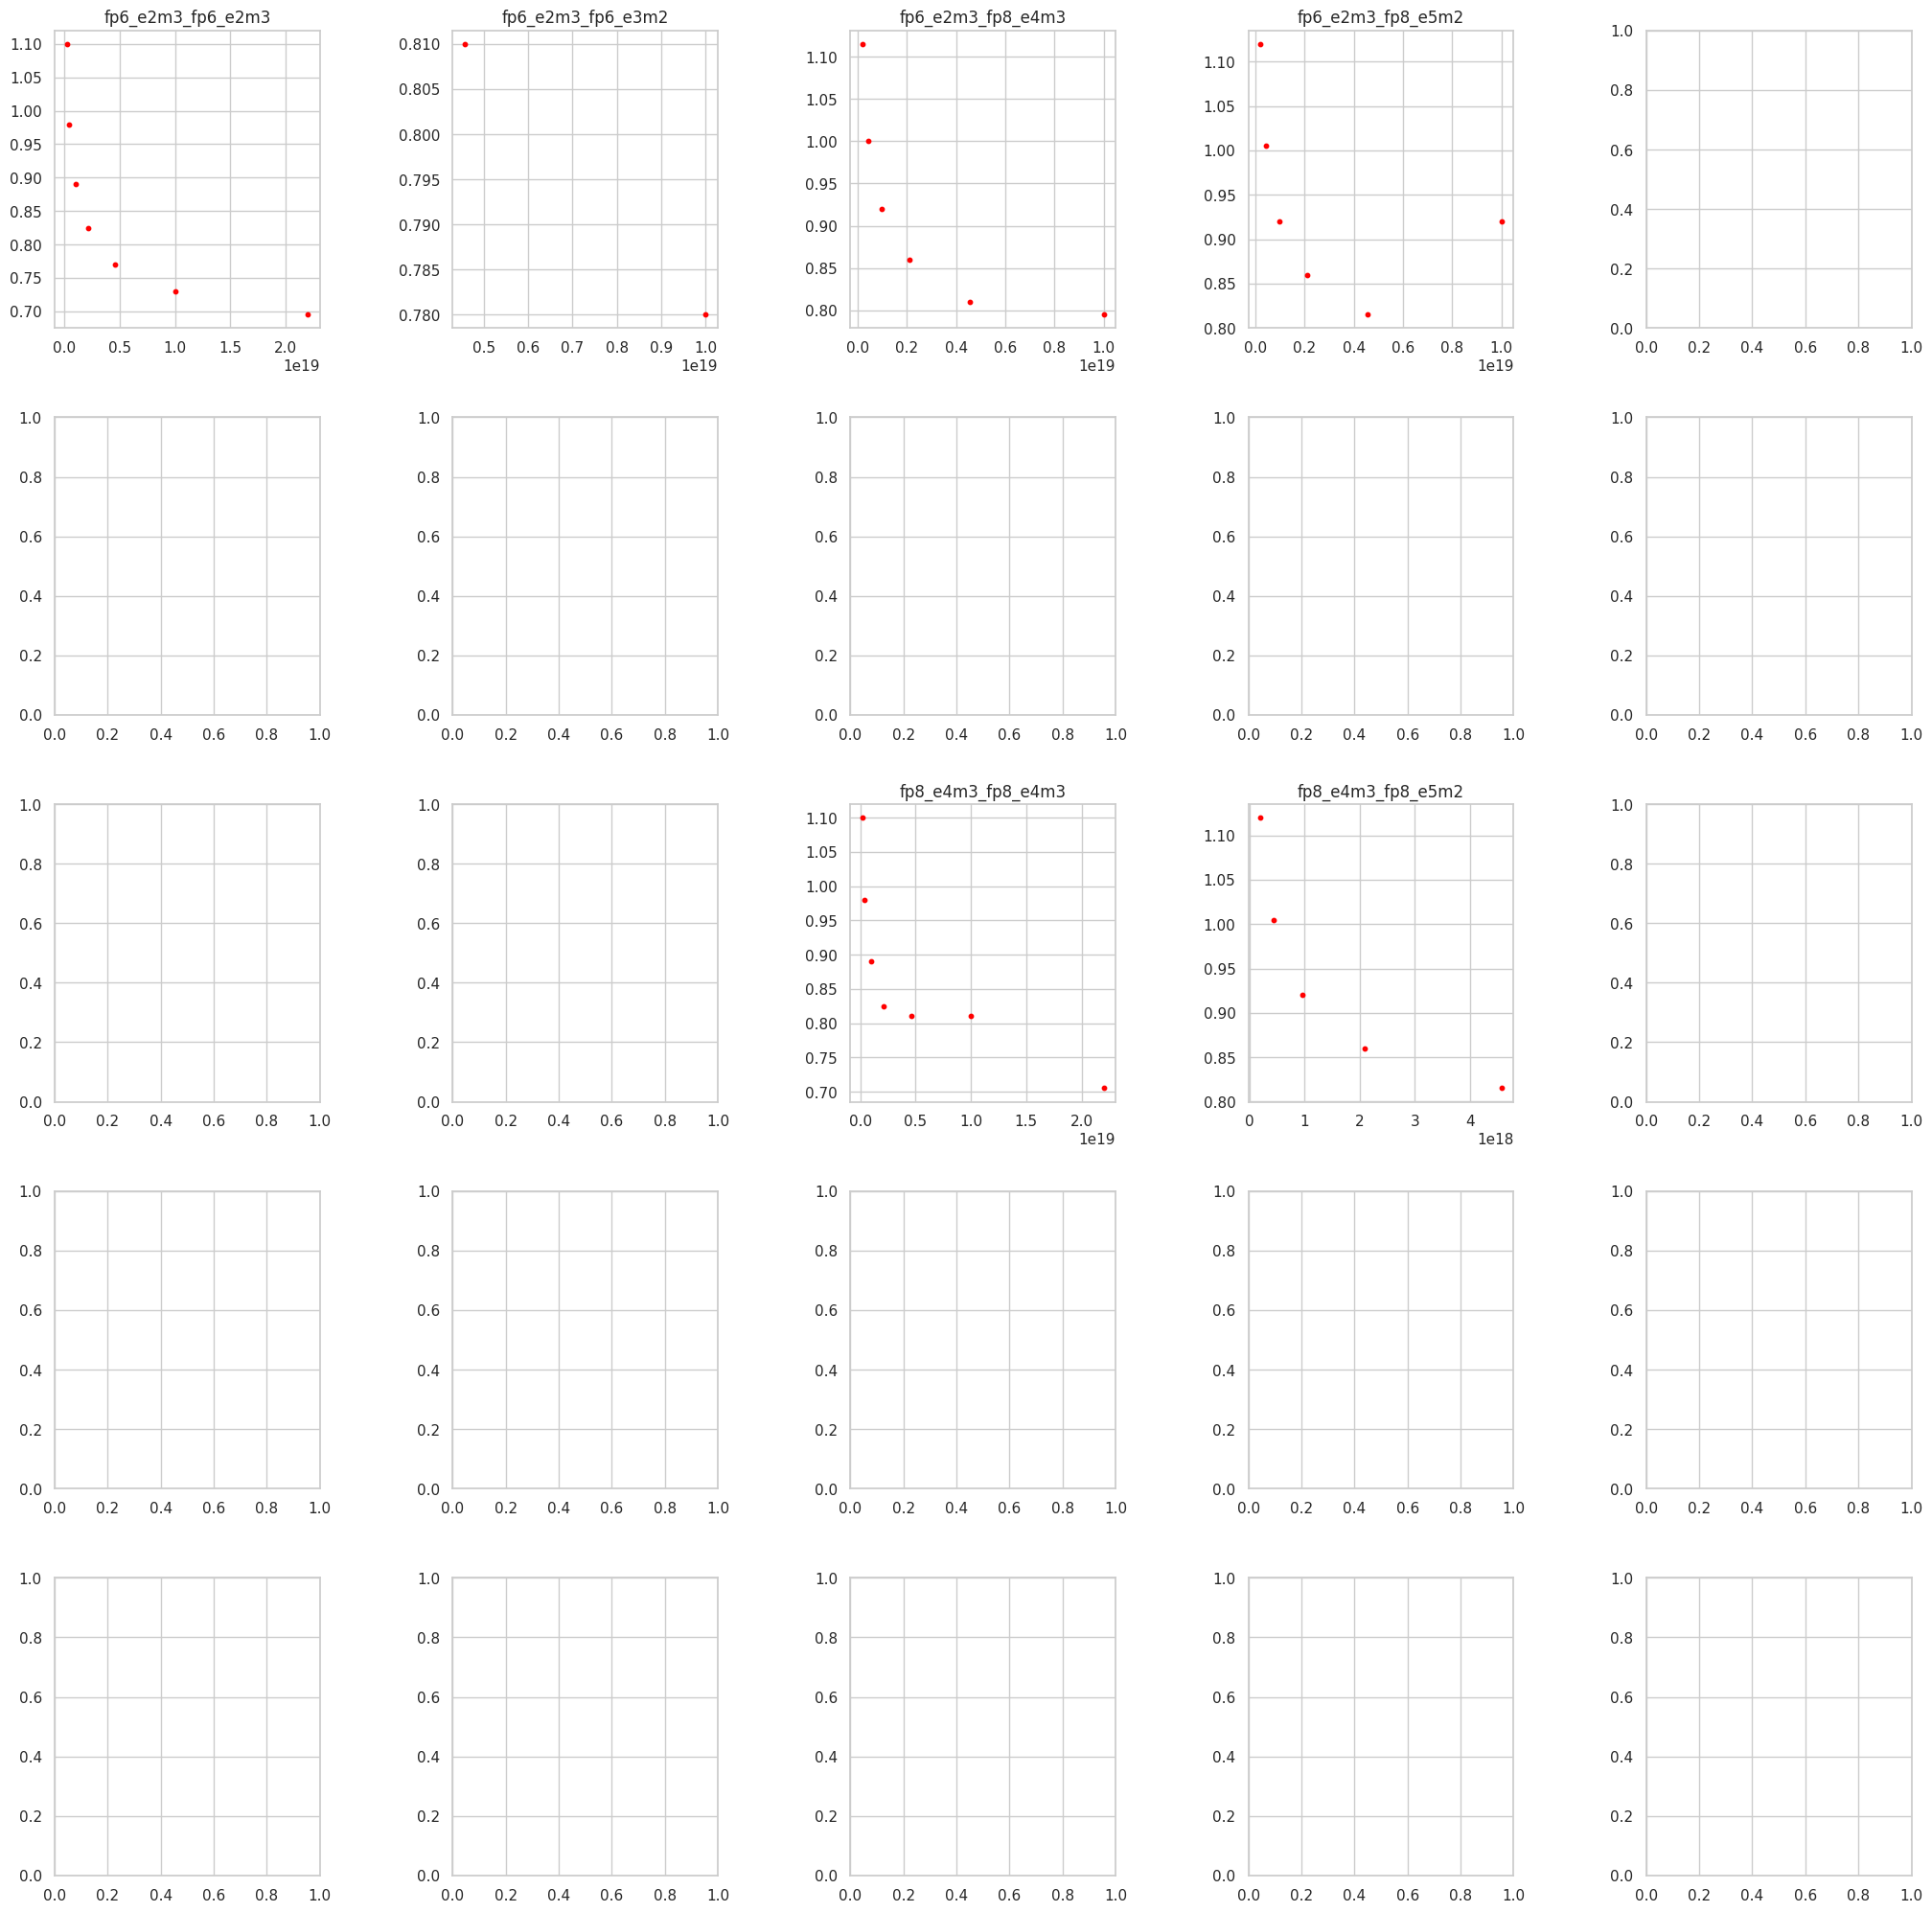

w_format = fp6_e2m3, fp6_e2m3
N 74
F 74
               F      L            N             D
68  2.000000e+17  1.100   72717120.0  4.582277e+08
59  4.000000e+17  0.980   90138240.0  8.084521e+08
50  1.000000e+18  0.890  134124288.0  1.188299e+09
37  2.100000e+18  0.825  266929152.0  1.305739e+09
25  4.600000e+18  0.770  311190848.0  2.449211e+09
9   1.000000e+19  0.730  541326912.0  3.078619e+09
0   2.200000e+19  0.695  415051200.0  8.833991e+09
w_format = fp6_e2m3, fp6_e3m2
N 12
F 12
              F     L            N             D
4  4.570000e+18  0.81  541326912.0  1.407975e+09
0  1.000000e+19  0.78  777930240.0  2.142241e+09
w_format = fp6_e2m3, fp8_e4m3
N 61
F 61
               F      L            N             D
55  2.000000e+17  1.115   72717120.0  4.582277e+08
46  4.400000e+17  1.000   90138240.0  8.084521e+08
36  9.600000e+17  0.920  161279040.0  9.882829e+08
21  2.090000e+18  0.860  360466560.0  9.667871e+08
8   4.570000e+18  0.810  541326912.0  1.407975e+09
0   1.000000e+19  0

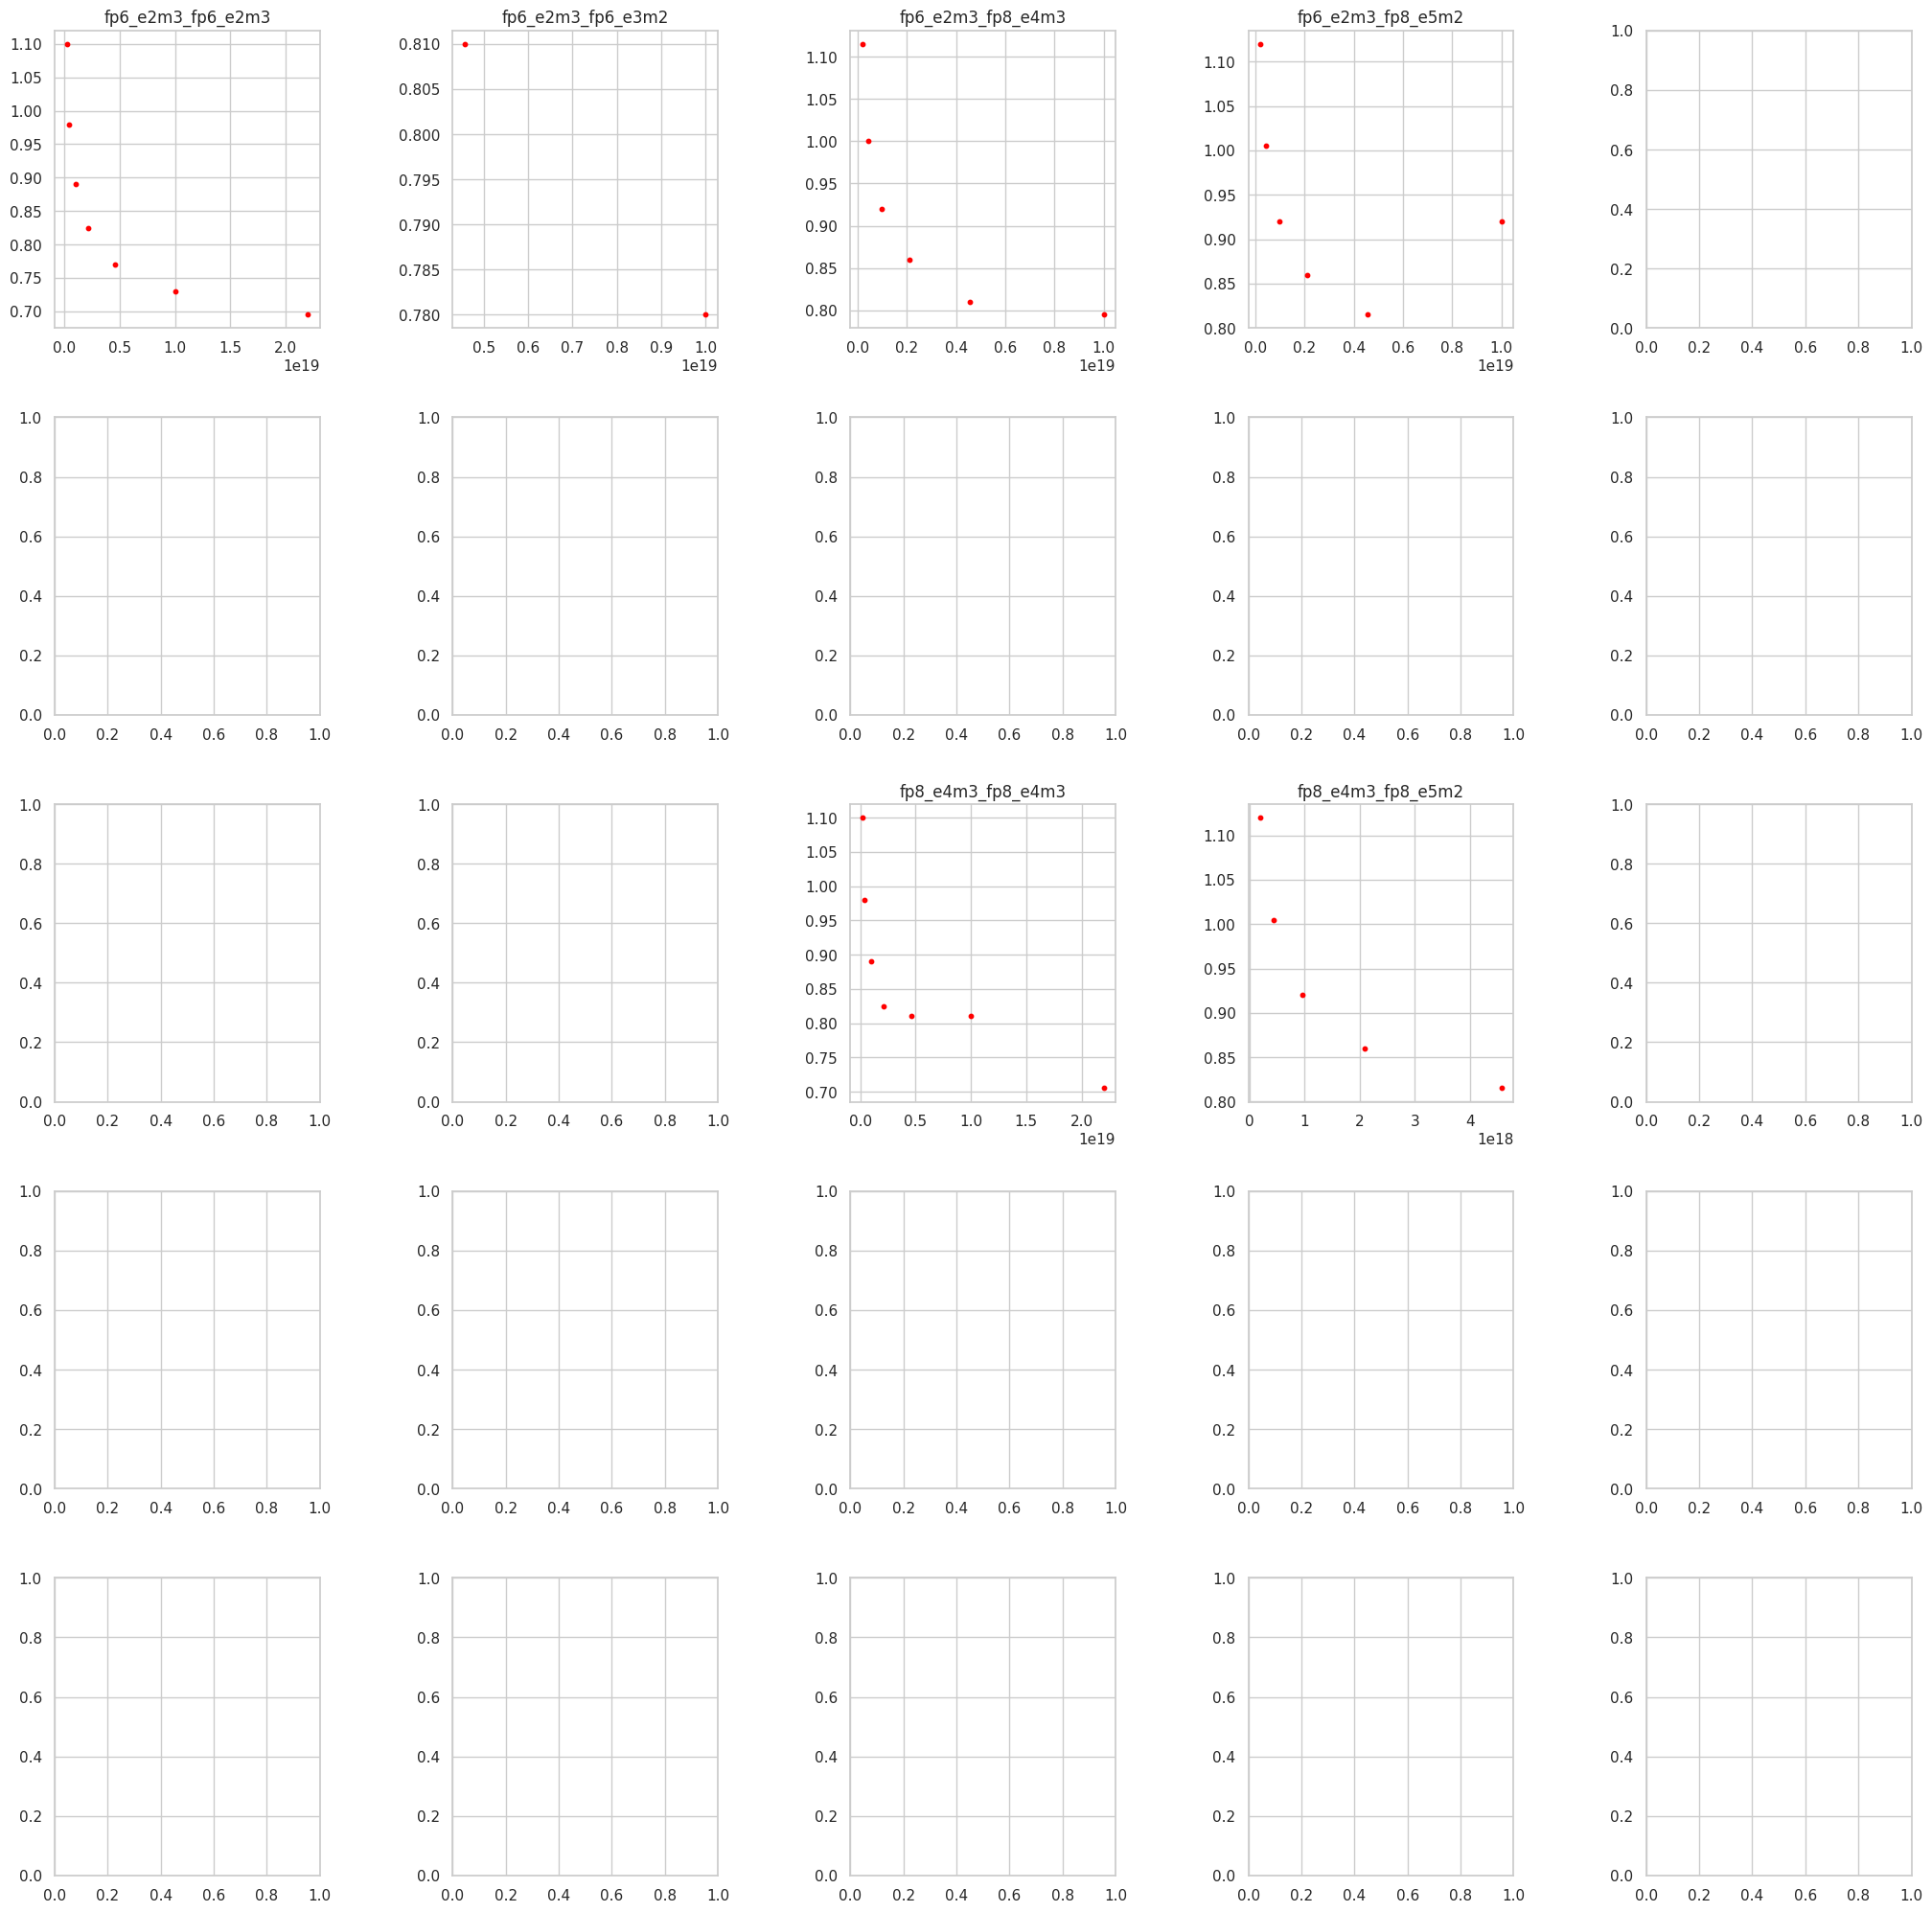

In [11]:
plot_params_df = pd.DataFrame()
for kaplan in [True, False]:
    fig, axs = plt.subplots(5, 5, figsize=(25, 25))
    fig.subplots_adjust(hspace=0.3, wspace=0.5)
    sns.set(style="whitegrid")
    axs = axs.flatten()
    for i, w_format in enumerate(formats):
        for j, a_format in enumerate(formats):
            
            for loss_name in ["min_val_loss"]:
                ax = axs[i * len(formats) + j]
                print(f"w_format = {w_format}, {a_format}")

                try: 
                    drop_df = pd.read_csv(f"data/{w_format}_{a_format}.csv")             
                    N, D, L = get_data(drop_df, loss_name)
                    print('N', len(N))
                    
                    F = 6 * np.array(N, dtype=np.float64) * np.array(D, dtype=np.float64)
                    F = np.round(F, -int(np.floor(np.log10(np.max(F))) - 2))

                    print('F', len(F))

                    df = pd.DataFrame({'F': F, 'L': L, 'N': N, 'D': D})
                    df_unique = df.loc[df.groupby('F')['L'].idxmin()]

                    print(df_unique)

                    ax.scatter(df_unique['F'], df_unique['L'], color='red', s=10, label='Min L per F')

                    

                    # params, _ = fit(N, D, L, kaplan=kaplan)
                    # print(f"Loss: {params['loss']}")
                
                    # extrapolation = None
                    # masks = np.ones(5)
                    # vals = np.zeros(5)
                    # plot_contours_params(ax, N, D, L, params, masks, vals, extrapolation, kaplan=kaplan)
                
                    ax.set_title(f"{w_format}_{a_format}")

                    params["kaplan"] = kaplan
                    params["w_format"] = w_format
                    params["a_format"] = a_format
                
                    params = pd.DataFrame([params.values], columns=params.index, index = [i])
                    plot_params_df = pd.concat([plot_params_df, params])
                
                except: pass

    plt.savefig(f"figures/all_curves_{'kaplan' if kaplan else 'chinchilla'}.pdf", bbox_inches='tight')
    plt.show()

In [7]:
# latex tabel of params
for kaplan in [True, False]:
    for i, data in enumerate(val_map.keys()):
        a, b, e, alpha, beta = plot_params_df[(plot_params_df["data"] == data) & (plot_params_df["kaplan"] == kaplan)].values[0][:5]
        print(f"{display_dict[data]} & {a:.2e} & {b:.2e} & {e:.2f} & {alpha:.2f} & {beta:.2f} & {beta / (alpha + beta):.2f} \\\\")
    print()

KeyError: 'data'

In [ ]:
formats = ["fp6_e2m3", "fp6_e3m2", "fp8_e4m3", "fp8_e5m2", "bfloat16", "fp32"]
formats = ["fp6_e2m3", "fp6_e3m2", "fp8_e4m3", "fp8_e5m2", "bfloat16", "fp32"]
plot_params_df = pd.DataFrame()
for kaplan in [True, False]:
    fig, axs = plt.subplots(5, 5, figsize=(25, 25))
    fig.subplots_adjust(hspace=0.3, wspace=0.5)
    sns.set(style="whitegrid")
    axs = axs.flatten()
    for i, w_format in enumerate(formats):
        for i, a_format in enumerate(formats):
    # for i, data in enumerate(val_map.keys()):
            
            for loss_name in ["val_loss"]:
                ax = axs[i]
                print(f"w_format = {w_format}")

                # drop_df = df[df["data"] == data]
                try: 
                    drop_df = pd.read_csv(f"data/{w_format}_{a_format}.csv")
                    # drop_df = df[(df["model.w_mx_format"] == w_format) & (df["model.a_mx_format"] == a_format)]
                
                    N, D, L = get_data(drop_df, loss_name)

                    params, _ = fit(N, D, L, kaplan=kaplan)
                    print(f"Loss: {params['loss']}")

                # df_big_data = df_big[(df_big["model.w_mx_format"] == w_format) & (df_big["model.a_mx_format"] == a_format)]
                # x = np.array(df_big_data["iso_flop"])
                # y = np.array(df_big_data["params"])
                # z = np.array(df_big_data["val_loss"])
                # extrapolation = (x,y,z)
                    extrapolation = None
                    masks = np.ones(5)
                    vals = np.zeros(5)
                    plot_contours(ax, N, D, L, params, masks, vals, extrapolation, kaplan=kaplan)
                # ax.set_title(f"{display_dict[data]}")
                    ax.set_title(f"{w_format}_{a_format}")

                    params["kaplan"] = kaplan
                    params["w_format"] = w_format
                    params["a_format"] = a_format
                # params["loss_name"] = val_map[data]
                    params = pd.DataFrame([params.values], columns=params.index, index = [i])
                    plot_params_df = pd.concat([plot_params_df, params])
                
                except: pass

    plt.savefig(f"figures/all_curves_{'kaplan' if kaplan else 'chinchilla'}.pdf", bbox_inches='tight')
    plt.show()